In [1]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [23]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = (x_train/255, x_test/255)

x_train = tf.expand_dims(x_train, -1)
x_train, x_validate = x_train[:50000], x_train[50000:]
y_train, y_validate = y_train[:50000], y_train[50000:]
x_test = tf.expand_dims(x_test, -1)
#y_train = tf.one_hot(y_train, 10)  somehow don't need one hot encoding for keras??

print(x_train.shape)
print(y_train.shape)


(50000, 28, 28, 1)
(50000,)


In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, input_shape = (28,28,1), activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1384512   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 1,385,482
Trainable params: 1,385,482
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_validate, y_validate))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1717 - accuracy: 0.9491 - val_loss: 0.0839 - val_accuracy: 0.9768
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0640 - val_accuracy: 0.9816
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0648 - val_accuracy: 0.9834
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0669 - val_accuracy: 0.9833
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0823 - val_accuracy: 0.9826
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0855 - val_accuracy: 0.9813
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0803 - val_accuracy:

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9821


[0.08846025168895721, 0.9821000099182129]

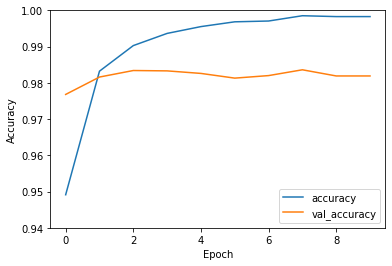

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94,1])
plt.legend(loc='lower right')
plt.show()